In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cv_test = pd.read_csv("C:/Users/BIT/Downloads/project_1.csv", encoding='utf-8')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [436]:
a = cv_test.sort_values(by = '등록일자', ascending = False)

In [437]:
b = pd.DataFrame(a, columns = ['등록일자', '분실물종류'])
b = b.reset_index()
num = pd.DataFrame({ 'Num' : range(1, 275522)})
c = pd.concat([num, b], axis=1)
d = pd.DataFrame(c, columns = ['Num','등록일자','분실물종류'])

In [438]:
# d['분실물종류'].value_counts()
# d['등록일자'].value_counts()
# c = b.drop(columns=['index'])

<AxesSubplot:xlabel='1년'>

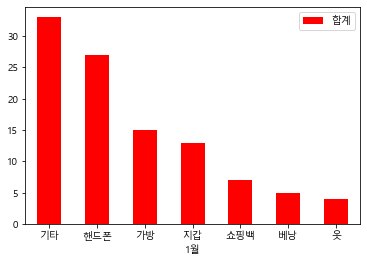

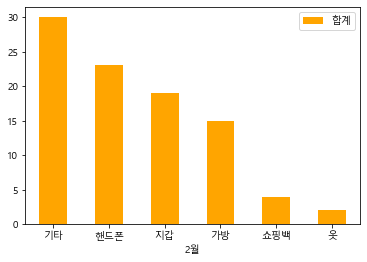

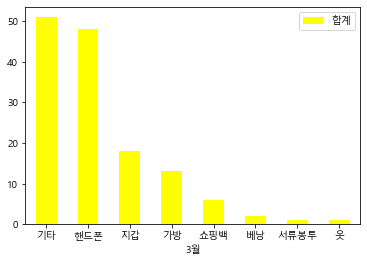

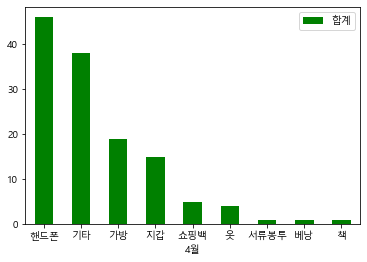

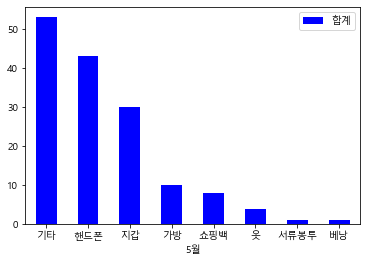

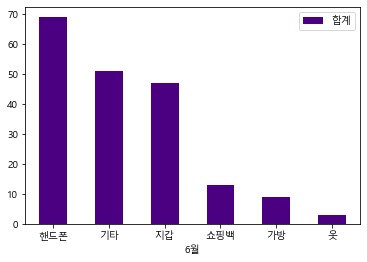

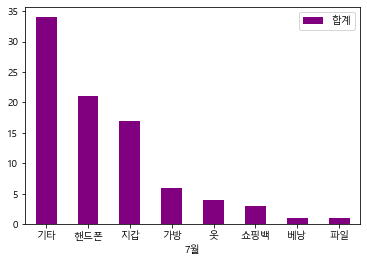

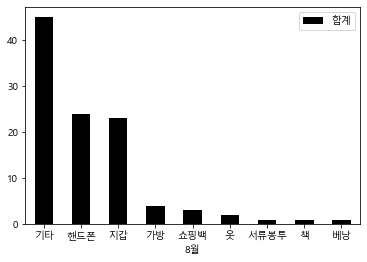

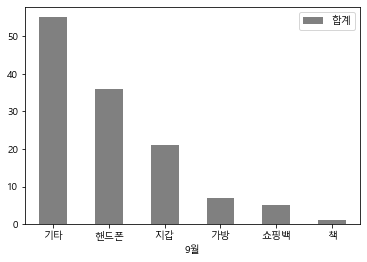

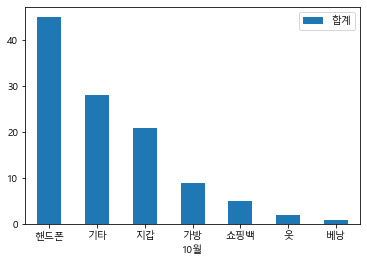

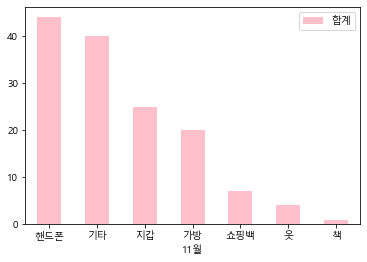

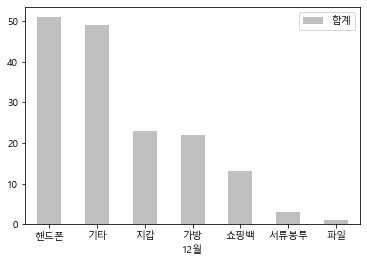

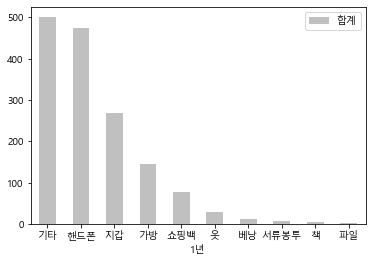

In [439]:
years = d.loc[0:1520]
January = d.loc[1435:1538]
February = d.loc[1342:1434]
March = d.loc[1202:1341]
April = d.loc[1072:1201]
May = d.loc[922:1071]
June = d.loc[730:921]
July = d.loc[643:729]
August = d.loc[539:642]
September = d.loc[414:538]
October = d.loc[303:413]
November =  d.loc[162:302]
December = d.loc[0:161]

###월별 분실물종류별 합계
January_df = January['분실물종류'].value_counts().rename_axis('1월').reset_index(name='합계')
February_df = February['분실물종류'].value_counts().rename_axis('2월').reset_index(name='합계')
March_df = March['분실물종류'].value_counts().rename_axis('3월').reset_index(name='합계')
April_df = April['분실물종류'].value_counts().rename_axis('4월').reset_index(name='합계')
May_df = May['분실물종류'].value_counts().rename_axis('5월').reset_index(name='합계')
June_df = June['분실물종류'].value_counts().rename_axis('6월').reset_index(name='합계')
July_df = July['분실물종류'].value_counts().rename_axis('7월').reset_index(name='합계')
August_df = August['분실물종류'].value_counts().rename_axis('8월').reset_index(name='합계')
September_df = September['분실물종류'].value_counts().rename_axis('9월').reset_index(name='합계')
October_df = October['분실물종류'].value_counts().rename_axis('10월').reset_index(name='합계')
November_df = November['분실물종류'].value_counts().rename_axis('11월').reset_index(name='합계')
December_df = December['분실물종류'].value_counts().rename_axis('12월').reset_index(name='합계')
years_df = years['분실물종류'].value_counts().rename_axis('1년').reset_index(name='합계')
###월별 분실물종류별 합계 막대그래프
January_df.plot.bar(x='1월', y='합계', rot=0, color = 'red')
February_df.plot.bar(x='2월', y='합계', rot=0, color = 'orange')
March_df.plot.bar(x='3월', y='합계', rot=0, color = 'yellow')
April_df.plot.bar(x='4월', y='합계', rot=0, color = 'green')
May_df.plot.bar(x='5월', y='합계', rot=0, color = 'blue')
June_df.plot.bar(x='6월', y='합계', rot=0, color = 'indigo')
July_df.plot.bar(x='7월', y='합계', rot=0, color = 'purple')
August_df.plot.bar(x='8월', y='합계', rot=0, color = 'black')
September_df.plot.bar(x='9월', y='합계', rot=0, color = 'gray')
October_df.plot.bar(x='10월', y='합계', rot=0)
November_df.plot.bar(x='11월', y='합계', rot=0, color = 'pink')
December_df.plot.bar(x='12월', y='합계', rot=0, color = 'silver')
years_df.plot.bar(x='1년', y='합계', rot=0, color = 'silver')

<AxesSubplot:>

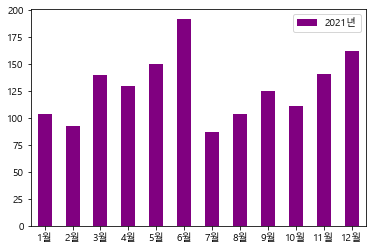

In [440]:
###월별 분실물 총 합계 막대그래프
col_name = ["2021년"]
sum_list = [January['분실물종류'].value_counts().sum(), February['분실물종류'].value_counts().sum(), March['분실물종류'].value_counts().sum(),April['분실물종류'].value_counts().sum(),May['분실물종류'].value_counts().sum(), June['분실물종류'].value_counts().sum(), July['분실물종류'].value_counts().sum(), August['분실물종류'].value_counts().sum(), September['분실물종류'].value_counts().sum(), October['분실물종류'].value_counts().sum(), November['분실물종류'].value_counts().sum(), December['분실물종류'].value_counts().sum()]
sum_df = pd.DataFrame(sum_list, columns=col_name, index = ["1월", "2월", "3월", "4월", "5월", "6월", "7월", "8월", "9월", "10월", "11월", "12월"])

sum_df.plot.bar(rot=0, color = 'purple')

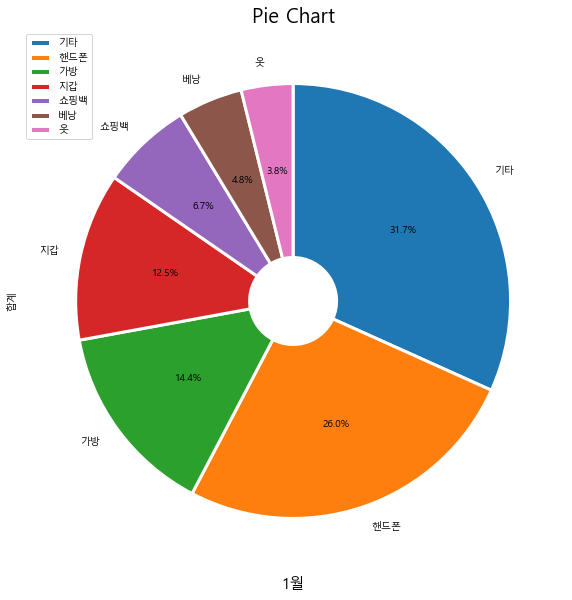

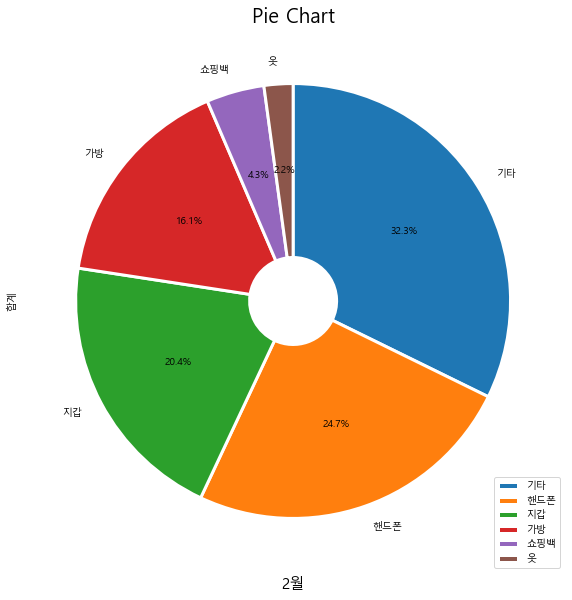

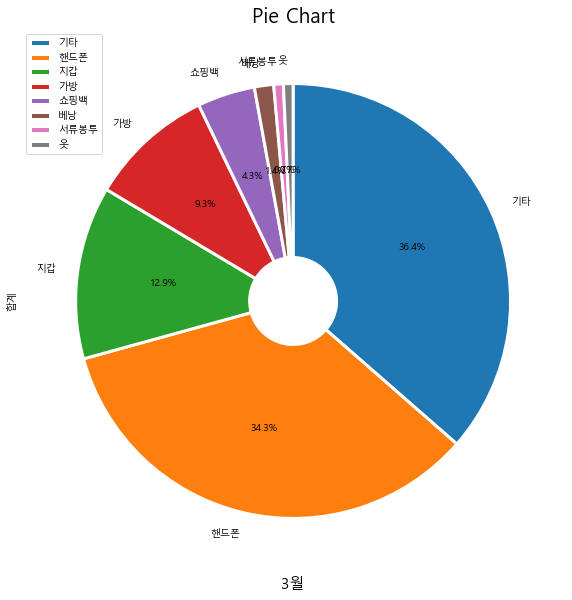

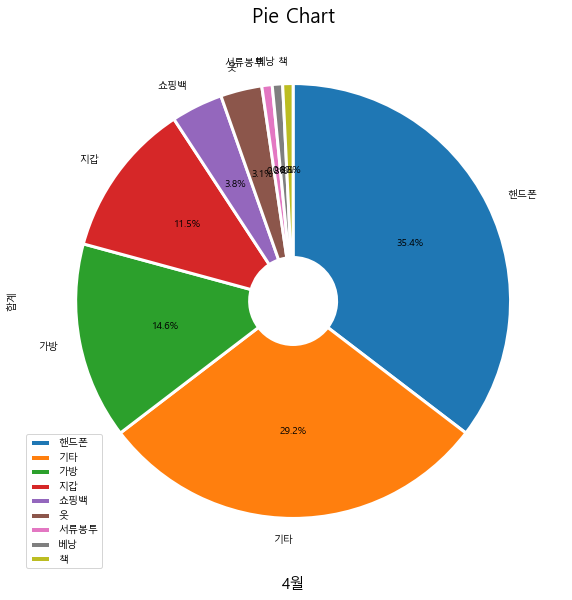

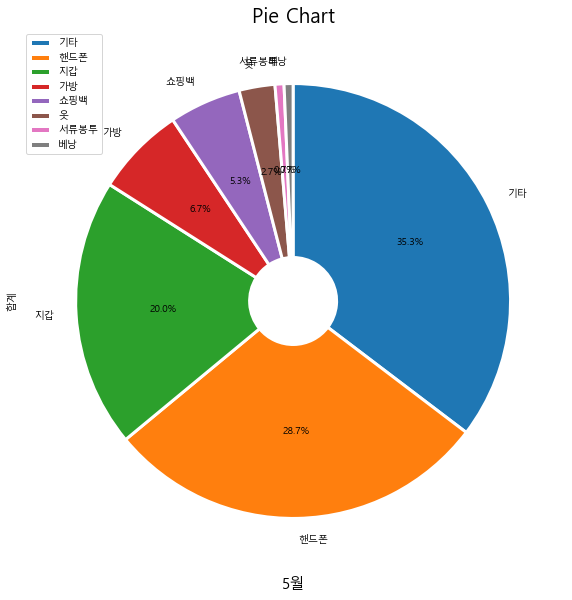

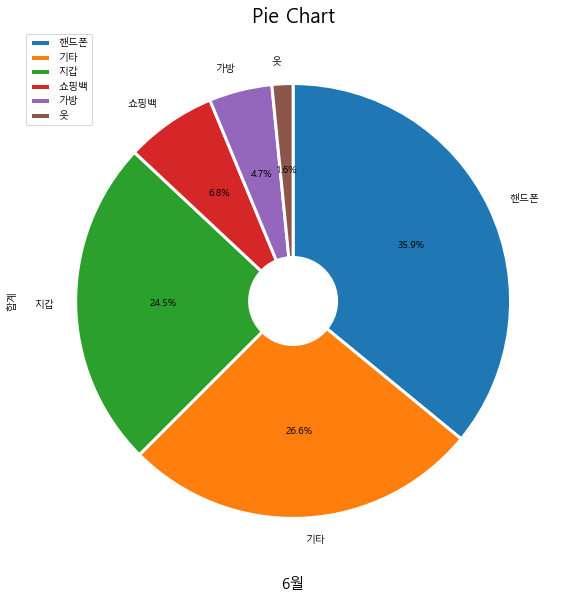

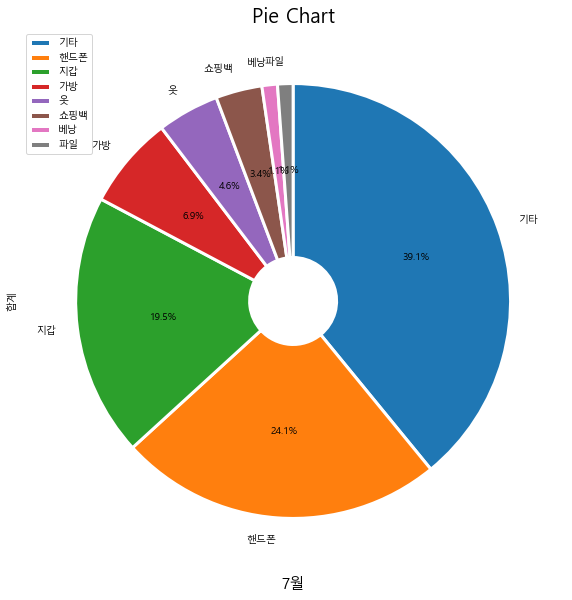

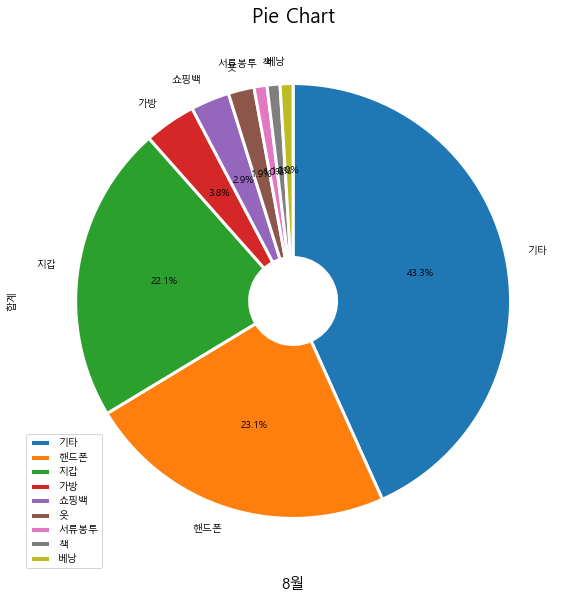

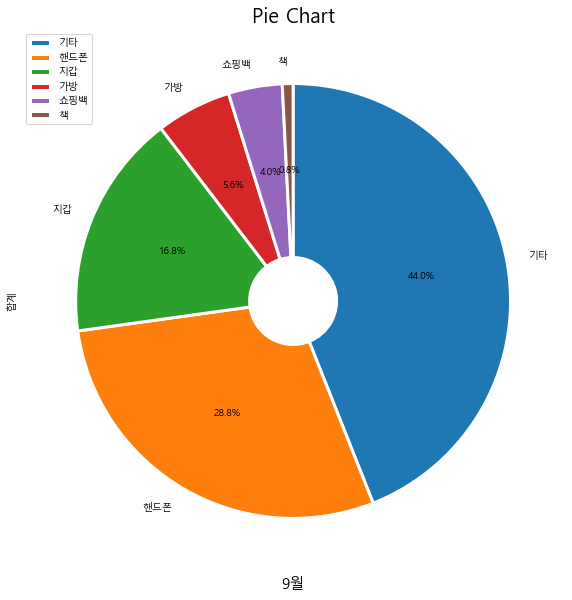

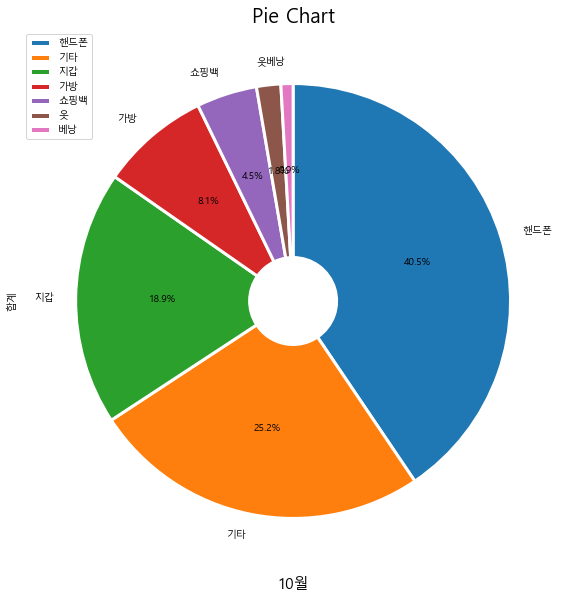

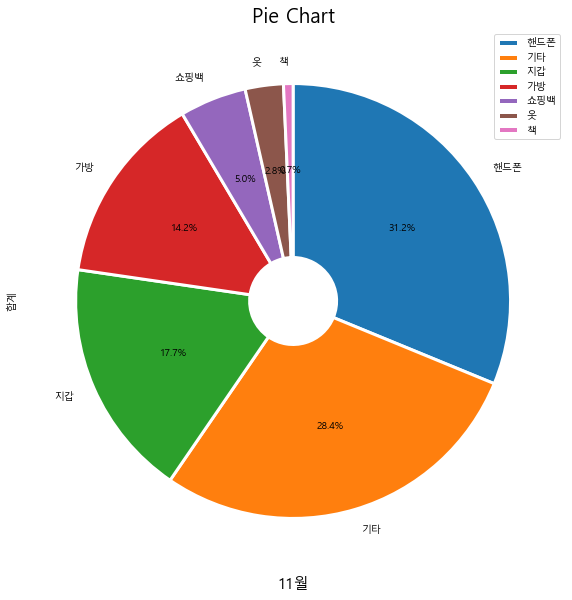

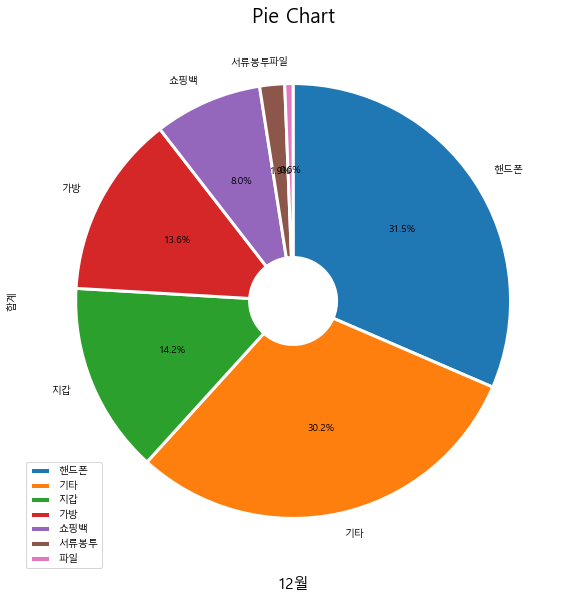

In [442]:
###월별 분실물종류별 빈도% 파이차트

wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}

January_df.plot.pie(x = '1월', y = '합계', labels = January_df['1월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("1월",fontsize=15)

February_df.plot.pie(x = '2월', y = '합계', labels = February_df['2월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("2월",fontsize=15)

March_df.plot.pie(x = '3월', y = '합계', labels = March_df['3월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("3월",fontsize=15)

April_df.plot.pie(x = '4월', y = '합계', labels = April_df['4월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("4월",fontsize=15)

May_df.plot.pie(x = '5월', y = '합계', labels = May_df['5월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("5월",fontsize=15)

June_df.plot.pie(x = '6월', y = '합계', labels = June_df['6월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("6월",fontsize=15)

July_df.plot.pie(x = '7월', y = '합계', labels = July_df['7월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("7월",fontsize=15)

August_df.plot.pie(x = '8월', y = '합계', labels = August_df['8월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("8월",fontsize=15)

September_df.plot.pie(x = '9월', y = '합계', labels = September_df['9월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("9월",fontsize=15)

October_df.plot.pie(x = '10월', y = '합계', labels = October_df['10월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("10월",fontsize=15)

November_df.plot.pie(x = '11월', y = '합계', labels = November_df['11월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("11월",fontsize=15)

December_df.plot.pie(x = '12월', y = '합계', labels = December_df['12월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
# plt.pie(December_df['합계'], labels = December_df['12월'], startangle = 90, counterclock = False, autopct = '%1.1f%%', wedgeprops=wedgeprops) #이런식으로도 표현가능
plt.title("Pie Chart", fontsize=20)
plt.xlabel("12월",fontsize=15)

plt.show()